In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer

In [3]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


# Convert lease_commence_date to age and discretise to bins

<Axes: ylabel='Frequency'>

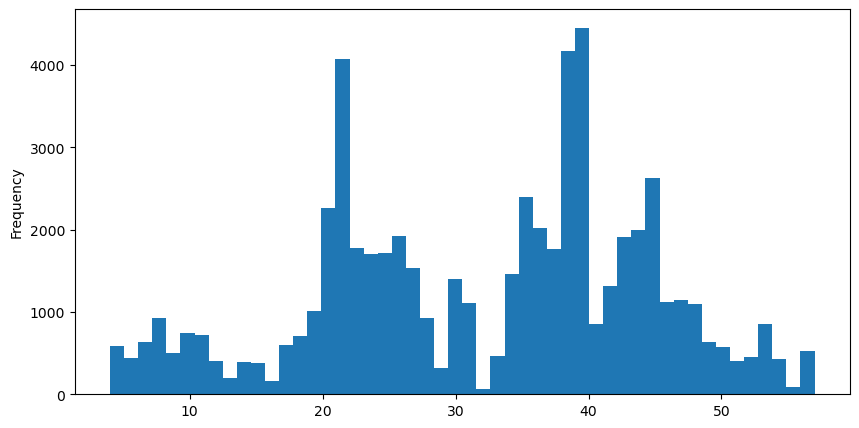

In [4]:
train_df['age'] = train_df['lease_commence_date'].apply(lambda x: 2023 - x)
train_df.drop(columns=['lease_commence_date'], inplace=True)
train_df['age'].plot(kind='hist', bins=50, figsize=(10, 5))

<Axes: ylabel='Frequency'>

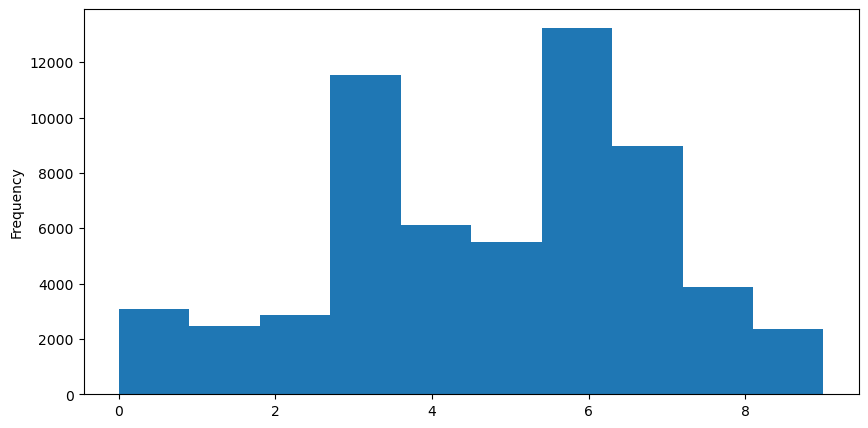

In [5]:
n_age_bins = 10
age_KBD = KBinsDiscretizer(n_bins=n_age_bins, encode='ordinal', strategy='uniform')
age_KBD.fit(train_df[['age']])
age_KBD.bin_edges_
train_df['age_bin'] = age_KBD.transform(train_df[['age']])
train_df['age_bin'].plot(kind='hist', bins=n_age_bins, figsize=(10, 5))

# Distance to good schools

In [5]:
school_df = pd.read_csv('./data/auxiliary-data/sg-primary-schools-processed.csv')
school_df.head()

,name,latitude,longitude
0,Admiralty,1.454038,103.817436
1,Ahmad Ibrahim,1.433153,103.832942
2,Ai Tong,1.360583,103.833020
3,Alexandra,1.291334,103.824425
4,Anchor Green,1.390370,103.887165


In [14]:
ballot_df = pd.read_csv('./data/auxiliary-data/sg-school-balloting-processed.csv')
ballot_df.head()

,School,Phase 1,2A,2B,2C
0,Admiralty,0.500000,0.426667,1.088235,1.557143
1,Ahmad Ibrahim,0.337500,0.094340,0.000000,0.171975
2,Ai Tong,0.475000,0.952381,2.545455,1.733333
3,Alexandra,0.407143,0.156627,0.093023,1.110236
4,Anchor Green,0.472222,0.315789,0.000000,0.281250


In [15]:
ballot_df.describe()

,Phase 1,2A,2B,2C
count,181.000000,181.000000,181.000000,181.000000
mean,0.456942,0.544013,0.457793,1.034816
std,0.133276,0.456326,0.678807,0.887193
min,0.155556,0.049180,0.000000,0.075630
25%,0.350000,0.198113,0.000000,0.371622
50%,0.470833,0.407407,0.071429,0.901961
75%,0.552381,0.788732,0.700000,1.400000
max,0.800000,3.543478,3.400000,5.895833


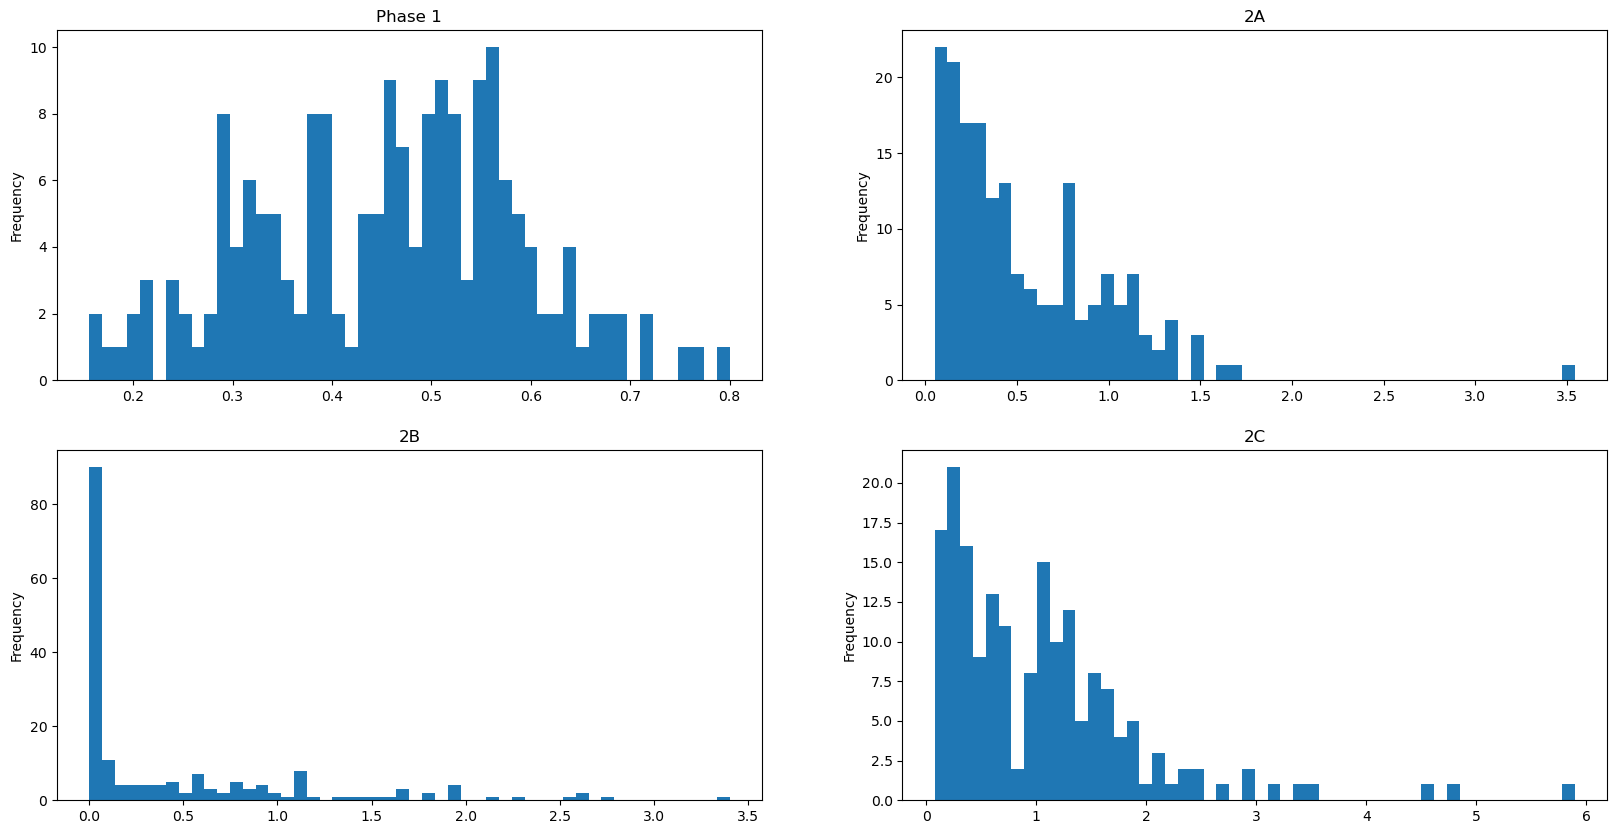

In [12]:
cols = ballot_df.columns[1:]
n = len(cols) // 2
fig,ax = plt.subplots(2, n, figsize=(20, 10))
for i, col in enumerate(cols):
    ballot_df[col].plot(ax=ax[i//n, i%n], kind='hist', bins=50)
    ax[i//n, i%n].set_title(col)

In [17]:
ballot_df[ballot_df['2C'] > 3]

,School,Phase 1,2A,2B,2C
92,Nan Hua,0.644444,1.476923,1.700000,4.800000
100,Northland,0.577778,0.947368,1.047619,4.545455
114,Princess Elizabeth,0.621429,1.679245,0.600000,5.895833
128,Rosyth,0.642857,1.600000,1.150000,3.463415
136,South View,0.576190,1.179775,1.700000,3.200000
142,St. Hildas,0.509524,1.097087,1.800000,3.400000


In [18]:
ballot_df[(ballot_df['2C'] > 2) & (ballot_df['2C'] < 3)]

,School,Phase 1,2A,2B,2C
15,Bukit Panjang,0.555556,0.975000,1.142857,2.119048
24,CHIJ St. Nicholas Girls,0.466667,1.287500,2.300000,2.100000
58,Gongshang,0.712500,3.543478,0.800000,2.431818
64,Holy Innocents,0.509524,1.116505,2.650000,2.875000
65,Hong Wen,0.546667,0.492754,0.937500,2.188406
91,Nan Chiau,0.545833,0.348624,2.733333,2.966292
113,Poi Ching,0.527778,0.270588,1.097561,2.402439
124,Red Swastika,0.522222,1.302326,1.100000,2.119048
129,Rulang,0.580952,1.159091,1.300000,2.731707
149,Tao Nan,0.610000,1.179487,3.400000,2.317073


In [20]:
pd.set_option('display.max_rows', None)
ballot_df[(ballot_df['2C'] > 1) & (ballot_df['2C'] < 2)]

,School,Phase 1,2A,2B,2C
0,Admiralty,0.500000,0.426667,1.088235,1.557143
2,Ai Tong,0.475000,0.952381,2.545455,1.733333
3,Alexandra,0.407143,0.156627,0.093023,1.110236
5,Anderson,0.473333,0.582278,0.612903,1.243243
7,Anglo-Chinese (Junior),0.361905,0.753731,1.677419,1.274194
8,Anglo-Chinese,0.311111,0.854839,1.961538,1.283019
9,Angsana,0.400000,0.719697,0.062500,1.757895
22,CHIJ Our Lady of the Nativity,0.333333,0.200000,0.865385,1.018018
23,CHIJ (Toa Payoh),0.340000,0.780000,1.962963,1.254545
25,Canberra,0.444444,0.160000,0.458333,1.073770
